In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import os

PATH = './finish/U1_save_five_years/PRCP/'
FILEPATH = os.listdir(PATH)

In [6]:
FILEPATH

['save.csv']

In [8]:
file = os.path.join(PATH, FILEPATH[0])

In [9]:
file

'./finish/U1_save_five_years/PRCP/save.csv'

In [16]:
dataset = np.loadtxt(file, delimiter=',', dtype='float')

In [18]:
dataset = dataset[:, 1:]

In [19]:
dataset.shape

(1818, 470)

In [20]:
X = dataset[:, :-1]
y = dataset[:, -1:]

In [21]:
print(X.shape)
print(y.shape)

(1818, 469)
(1818, 1)


In [22]:
print(X.dtype)
print(y.dtype)

float64
float64


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [24]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [25]:
input_size = X.shape[1]
LR = 1e-2

In [26]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.hidden1 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(True)
        )
        
        self.hidden2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(True)
        )
        
        self.hidden3 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(True)
        )
        
        self.pred = nn.Sequential(
            nn.Linear(32, 1),
#             nn.ReLU(True)
        )
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        
        out = self.pred(x)
        
        return out

In [27]:
net = Net()
net

Net(
  (hidden1): Sequential(
    (0): Linear(in_features=469, out_features=128, bias=True)
    (1): ReLU(inplace)
  )
  (hidden2): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU(inplace)
  )
  (hidden3): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU(inplace)
  )
  (pred): Sequential(
    (0): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [28]:
optimizer = torch.optim.Adam(net.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [38]:
EPOCH = 1000
Train_loss = []
Test_loss = []

for epoch in range(EPOCH):
    input_x = Variable(torch.FloatTensor(X_train_standard))
    input_y = Variable(torch.FloatTensor(y_train))
    
    out = net(input_x)
    train_loss = loss_func(out, input_y)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print('Eopch: ', (epoch+1), 'Loss: ', train_loss.data.numpy())

Eopch:  10 Loss:  0.06685522
Eopch:  20 Loss:  0.06685476
Eopch:  30 Loss:  0.066854395
Eopch:  40 Loss:  0.06685408
Eopch:  50 Loss:  0.0668538
Eopch:  60 Loss:  0.06685354
Eopch:  70 Loss:  0.06685331
Eopch:  80 Loss:  0.0668531
Eopch:  90 Loss:  0.06685291
Eopch:  100 Loss:  0.06685274
Eopch:  110 Loss:  0.06685258
Eopch:  120 Loss:  0.066852435
Eopch:  130 Loss:  0.0668523
Eopch:  140 Loss:  0.066852175
Eopch:  150 Loss:  0.06685206
Eopch:  160 Loss:  0.06685195
Eopch:  170 Loss:  0.066851854
Eopch:  180 Loss:  0.066851765
Eopch:  190 Loss:  0.06685168
Eopch:  200 Loss:  0.0668516
Eopch:  210 Loss:  0.06685153
Eopch:  220 Loss:  0.06685145
Eopch:  230 Loss:  0.0668514
Eopch:  240 Loss:  0.06685201
Eopch:  250 Loss:  0.06698861
Eopch:  260 Loss:  0.12950349
Eopch:  270 Loss:  1.8676311
Eopch:  280 Loss:  0.4080698
Eopch:  290 Loss:  0.068943985
Eopch:  300 Loss:  0.19042236
Eopch:  310 Loss:  0.18061873
Eopch:  320 Loss:  0.1749862
Eopch:  330 Loss:  0.17009784
Eopch:  340 Loss:  0.

In [39]:
test_x = Variable(torch.FloatTensor(X_test_standard))
test_y = Variable(torch.FloatTensor(y_test))

test_out = net(test_x)

test_loss = loss_func(test_out, test_y)

In [40]:
test_loss.data.numpy()

array(665.301, dtype=float32)

In [41]:
# tensor to array
predcition = test_out.data.numpy()

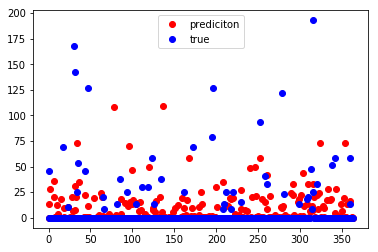

In [45]:
plt.plot(range(len(predcition)), predcition, 'ro', label="prediciton")
plt.plot(range(len(y_test)), y_test, 'bo', label='true')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, predcition)

-0.33457634022751614